# Natural Language Processing

## Exercise Sheet 2

In [1]:
#imports for all exercises

# Language resources from NLTK
import nltk 
from nltk.book import *
from nltk.corpus import *
from nltk import FreqDist, bigrams
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### Exercise 1

Plot the conditional frequency distribution of how the usage of the words "men", "women", and "people" has changed over time in the Inaugural Address Corpus.


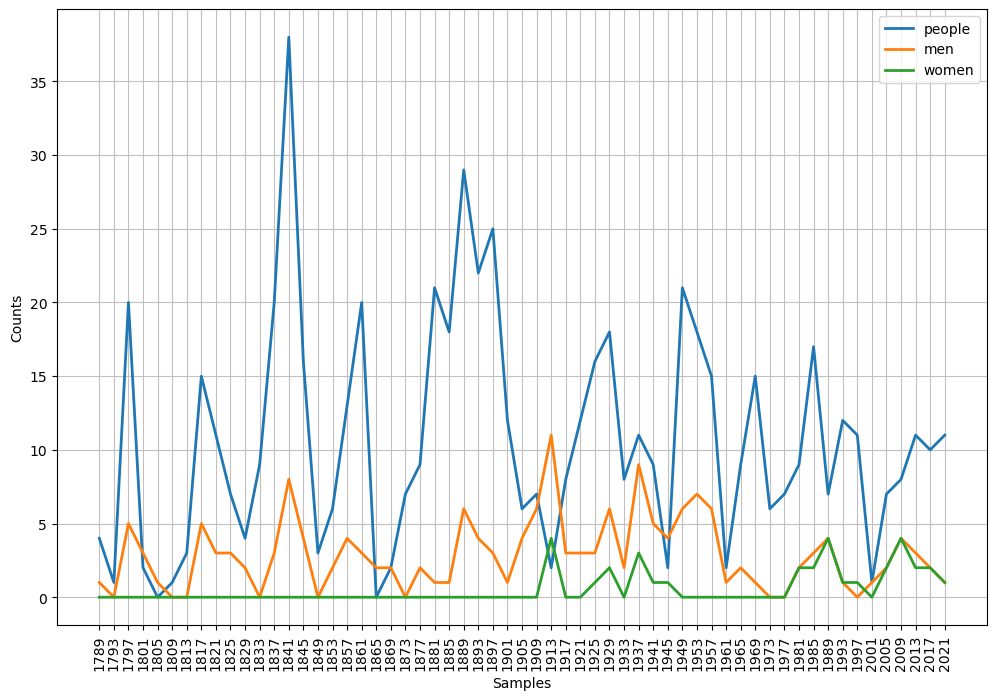

In [2]:
# Extract the words and years from the Inaugural Address Corpus
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['men', 'women', 'people']
    if w.lower().startswith(target)
)

# Plot the conditional frequency distribution
plt.figure(figsize=(12, 8))
cfd.plot()
plt.show()

### Exercise 2

Plot a conditional frequency distribution over the Names Corpus that allows you to see which initial letters are more frequent for males vs. females.

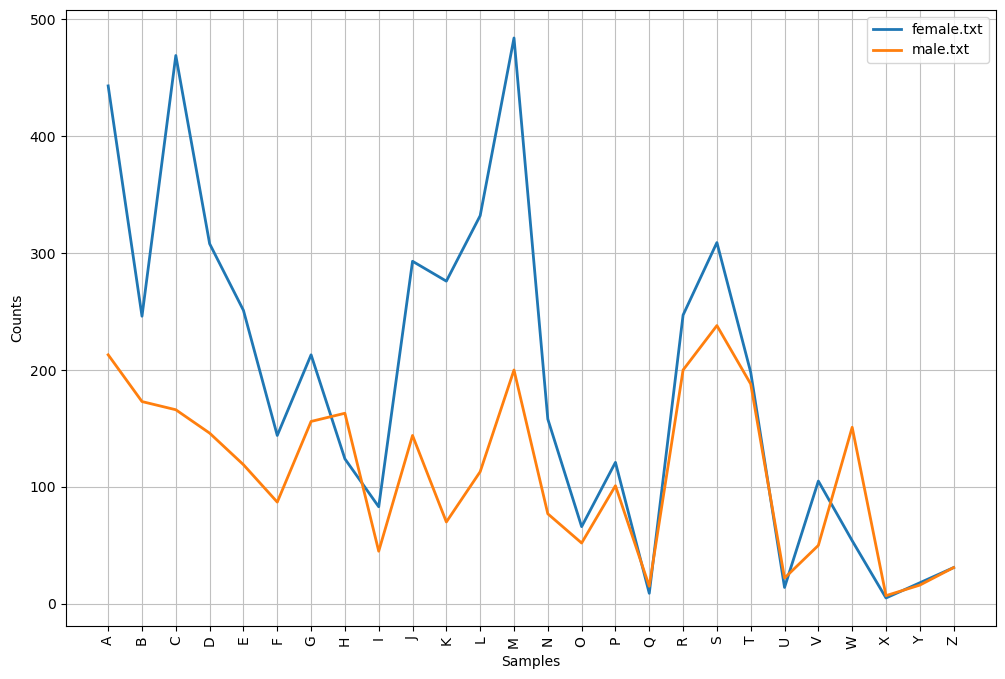

In [3]:
# Extract initial letters and genders from the Names Corpus
cfd = nltk.ConditionalFreqDist(
    (fileid, name[0].upper())
    for fileid in names.fileids()
    for name in names.words(fileid)
)

# Plot the conditional frequency distribution
plt.figure(figsize=(12, 8))
cfd.plot()
plt.show()

### Exercise 3

What percentage of noun synsets have no hyponyms? You can get all noun synsets using `wn.all_synsets('n')`.

In [4]:
from nltk.corpus import wordnet as wn

# Get all noun synsets
noun_synsets = list(wn.all_synsets('n'))

# Count the number of noun synsets with no hyponyms
no_hyponyms_count = sum(1 for synset in noun_synsets if not synset.hyponyms())

# Calculate the percentage
percentage_no_hyponyms = (no_hyponyms_count / len(noun_synsets)) * 100

print(f"Percentage of noun synsets with no hyponyms: {percentage_no_hyponyms}%")

Percentage of noun synsets with no hyponyms: 79.67119283931072%


### Exercise 4

Define a function `supergloss(s)` that takes a synset $s$ as its argument and returns a string consisting of the concatenation of the definition of $s$, and the definitions of all the hypernyms and hyponyms of $s$. Apply the function to the synset "car.n.01".

In [5]:
def supergloss(s):
    
    definitions = []

    # Add the definition of the synset itself
    definitions.append(s.definition())

    # Add definitions of all hypernyms
    for hypernym in s.hypernyms():
        definitions.append(hypernym.definition())

    # Add definitions of all hyponyms
    for hyponym in s.hyponyms():
        definitions.append(hyponym.definition())

    return '\n'.join(definitions)

# Apply the function to the synset 'car.n.01'
car_synset = wn.synset('car.n.01')
supergloss_result = supergloss(car_synset)

print(supergloss_result)

a motor vehicle with four wheels; usually propelled by an internal combustion engine
a self-propelled wheeled vehicle that does not run on rails
a vehicle that takes people to and from hospitals
a car that has a long body and rear door with space behind rear seat
a car that is old and unreliable
a car driven by a person whose job is to take passengers where they want to go in exchange for money
a small and economical car
a car that has top that can be folded or removed
a car with two doors and front seats and a luggage compartment
a car in which policemen cruise the streets; equipped with radiotelephonic communications to headquarters
a car that is powered by electricity
a car with relatively low fuel efficiency
a car that resembles a convertible but has a fixed rigid top
a car having a hatchback door
an early term for an automobile
a car modified to increase its speed and acceleration
a car suitable for traveling over rough terrain
large luxurious car; usually driven by a chauffeur
a 

### Exercise 5

Define a function to find all words that occur at least $n$ times in the Brown Corpus. Call the function with the value $n=200$.

In [6]:
def words_occuring_n_times(n):

    # Count the occurrences of each word in the Brown Corpus
    word_counts = nltk.FreqDist(w.lower() for w in brown.words())

    # Find words that occur at least n times
    frequent_words = [word for word, count in word_counts.items() if count >= n]

    return frequent_words

# Call the function with n = 200
frequent_words = words_occuring_n_times(200)
print(frequent_words)

['the', 'said', 'an', 'of', '``', 'no', 'evidence', "''", 'that', 'any', 'took', 'place', '.', 'further', 'in', 'city', ',', 'which', 'had', 'and', 'for', 'was', 'been', 'by', 'court', 'to', 'possible', 'only', 'a', 'such', 'interest', 'number', 'this', 'it', 'did', 'find', 'many', 'are', 'or', 'often', 'act', 'have', 'these', 'end', 'them', 'on', 'other', 'among', 'well', 'best', 'both', 'however', 'two', 'should', 'be', 'cost', 'department', 'is', 'as', 'result', 'take', 'problem', 'law', 'also', 'next', 'provide', 'so', 'may', 'at', 'state', 'federal', 'child', 'one', 'major', 'general', 'program', 'but', 'has', 'seen', 'through', 'all', 'with', 'money', 'they', 'might', 'our', 'less', 'we', 'feel', 'future', 'some', 'available', 'do', 'will', 'under', 'its', 'found', 'into', 'fact', 'effect', 'from', 'new', 'when', '1', 'political', 'not', 'there', ':', '(', ')', 'four', 'night', '2', 'work', 'plan', 'tax', 'office', 'his', 'wife', 'mrs.', 'upon', 'age', 'together', 'man', 'more', 

### Exercise 6

Write a program that lists the lexical diversity scores for all Brown Corpus genres, one per line.


In [7]:
# Iterate through each category in the Brown Corpus
for category in brown.categories():
    # Count the total number of tokens (words) in the current category
    tokens = len(brown.words(categories=category))

    # Count the number of unique tokens (types) in the current category by converting the words to a set
    types = len(set(brown.words(categories=category)))

    # Calculate the lexical diversity for the category
    diversity = types / tokens                               

    # Print the category and its corresponding lexical diversity
    print(category,':', diversity)

adventure : 0.1279743878169075
belles_lettres : 0.10642071451679992
editorial : 0.16054152327770924
fiction : 0.1358194136199042
government : 0.11667641228232811
hobbies : 0.14493897625842492
humor : 0.23125144042406084
learned : 0.09268890745953554
lore : 0.13148804612915801
mystery : 0.12212912592488936
news : 0.14314696580941583
religion : 0.1617553745018909
reviews : 0.21192020440251572
romance : 0.12070492131044529
science_fiction : 0.22342778161713892


### Exercise 7

Write a function that finds the 50 most frequently occurring words of a text that are not stopwords. Apply the function to the "news" genre of the Brown Corpus. 



In [8]:
def most_frequent_non_stopwords(text, num_words=50):
    
    # Get English stopwords
    stop_words = set(stopwords.words('english'))

    # Filter out stopwords and punctuation, then create frequency distribution
    words = [word.lower() for word in text if word.isalpha() and word.lower() not in stop_words]
    freq_dist = FreqDist(words)

    # Return the most common non-stopwords
    return freq_dist.most_common(num_words)

# Apply the function to the 'news' genre of the Brown Corpus
most_frequent_words_news = most_frequent_non_stopwords(brown.words(categories='news'))
print(most_frequent_words_news)

[('said', 406), ('would', 246), ('new', 241), ('one', 213), ('last', 177), ('two', 174), ('first', 158), ('state', 153), ('year', 142), ('president', 142), ('home', 132), ('also', 129), ('made', 107), ('time', 103), ('years', 102), ('three', 101), ('house', 97), ('week', 94), ('city', 93), ('may', 93), ('school', 87), ('could', 87), ('four', 82), ('day', 76), ('committee', 75), ('man', 74), ('members', 74), ('back', 73), ('government', 73), ('many', 72), ('national', 72), ('university', 70), ('bill', 69), ('get', 68), ('high', 68), ('work', 67), ('since', 67), ('american', 67), ('program', 66), ('kennedy', 66), ('night', 65), ('john', 65), ('board', 64), ('administration', 62), ('meeting', 62), ('county', 61), ('per', 61), ('even', 61), ('states', 60), ('tax', 58)]


### Exercise 8

Write a function that finds the 50 most frequently occurring bigrams of a text, omitting bigrams that contain stopwords. Apply the function to the "news" genre of the Brown Corpus. 


In [9]:
def most_frequent_non_stopword_bigrams(text, num_bigrams=50):

    # Get English stopwords
    stop_words = set(stopwords.words('english'))

    # Filter out stopwords, then create bigrams
    filtered_words = [word.lower() for word in text if word.isalpha() and word.lower() not in stop_words]
    filtered_bigrams = list(bigrams(filtered_words))

    # Create frequency distribution of bigrams
    freq_dist_bigrams = FreqDist(filtered_bigrams)

    # Return the most common non-stopword bigrams
    return freq_dist_bigrams.most_common(num_bigrams)

# Apply the function to the 'news' genre of the Brown Corpus
most_frequent_bigrams_news = most_frequent_non_stopword_bigrams(brown.words(categories='news'))
print(most_frequent_bigrams_news)

[(('new', 'york'), 52), (('per', 'cent'), 50), (('united', 'states'), 37), (('last', 'week'), 35), (('last', 'year'), 34), (('white', 'house'), 29), (('high', 'school'), 23), (('home', 'runs'), 23), (('president', 'kennedy'), 20), (('last', 'night'), 18), (('said', 'would'), 15), (('years', 'ago'), 15), (('san', 'francisco'), 15), (('premier', 'khrushchev'), 13), (('kansas', 'city'), 13), (('vice', 'president'), 12), (('los', 'angeles'), 12), (('united', 'nations'), 11), (('new', 'orleans'), 11), (('police', 'said'), 11), (('sales', 'tax'), 10), (('two', 'years'), 10), (('american', 'catholic'), 10), (('mantle', 'maris'), 10), (('jury', 'said'), 9), (('would', 'like'), 9), (('el', 'paso'), 9), (('social', 'security'), 9), (('kennedy', 'administration'), 9), (('first', 'time'), 9), (('country', 'club'), 9), (('rules', 'committee'), 9), (('air', 'force'), 9), (('tax', 'bill'), 9), (('grand', 'jury'), 8), (('city', 'council'), 8), (('rhode', 'island'), 8), (('president', 'said'), 8), (('w

### Exercise 9

Write a function `word_freq()` that takes a word and the name of a Brown Corpus genre as arguments, and computes the frequency of the word in that section of the corpus. Use the function to compute the frequency of "love" in "news" vs. "romance" genre.

In [10]:
def word_freq(word, genre):

    # Get words from the specified genre
    genre_words = brown.words(categories=genre)

    # Calculate frequency of the specified word
    freq_dist = nltk.FreqDist(w.lower() for w in genre_words)
    word_frequency = freq_dist[word.lower()]

    return word_frequency

# Compute the frequency of "love" in "news" and "romance" genres
love_freq_news = word_freq("love", "news")
love_freq_romance = word_freq("love", "romance")

print(f"Frequency of 'love' in 'news': {love_freq_news}")
print(f"Frequency of 'love' in 'romance': {love_freq_romance}")

Frequency of 'love' in 'news': 3
Frequency of 'love' in 'romance': 36


### Exercise 10

Define a function `find_language()` that takes a string as its argument, and returns a list of languages that have that string as a word. Use the Universal Declaration of Human Rights Corpus and limit your searches to files in the Latin-1 encoding. Use the function to find the languages for the string "basis".


In [11]:
def find_language(target_word):
    
    langs = []
    
    # Iterates over each file ID in the UDHR corpus
    for lang in udhr.fileids():
        # Checks if the file ID ends with 'Latin1', indicating its encoding
        if lang.endswith('Latin1') and target_word in udhr.words(lang):
            # If the target_word is found, append the language code to the list
            langs.append(lang)
    return langs

find_language('basis')

['Afrikaans-Latin1', 'English-Latin1']

### Exercise 11

What is the branching factor of the noun hypernym hierarchy, i.e. for every noun synset that has hyponyms, how many do they have on average? 

In [12]:
# Initialize counters for the number of synsets with hyponyms and the total number of hyponyms
cnt = 0  
hypos = 0  

# Iterate through all noun synsets in WordNet
for synset in wn.all_synsets('n'):
    # Check if the current synset has hyponyms 
    if synset.hyponyms() != []:
        # Add the number of hyponyms for this synset to the total count
        hypos += len(synset.hyponyms())
        # Increment the synset counter
        cnt += 1

# Calculate the average branching factor
branching_factor = (hypos / cnt)

# Print the calculated average branching factor
print(f"The branching factor of the noun hypernym hierarchy on average in WordNet is: {branching_factor}")


The branching factor of the noun hypernym hierarchy on average in WordNet is: 4.543820763194153
